In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D 
from keras.layers import Dense, Dropout, Flatten 
from keras.utils.np_utils import to_categorical


sns.set(style='darkgrid', font_scale=1.4)
%matplotlib inline
import time
import warnings
warnings.filterwarnings("ignore")

# Sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
%cd /content/drive/MyDrive/kaggle/mnist/

train_df = pd.read_csv("train.csv")
train_df = train_df.sort_values(by = ['label'])
# test_df = pd.read_csv("test.csv")

/content/drive/MyDrive/kaggle/mnist


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

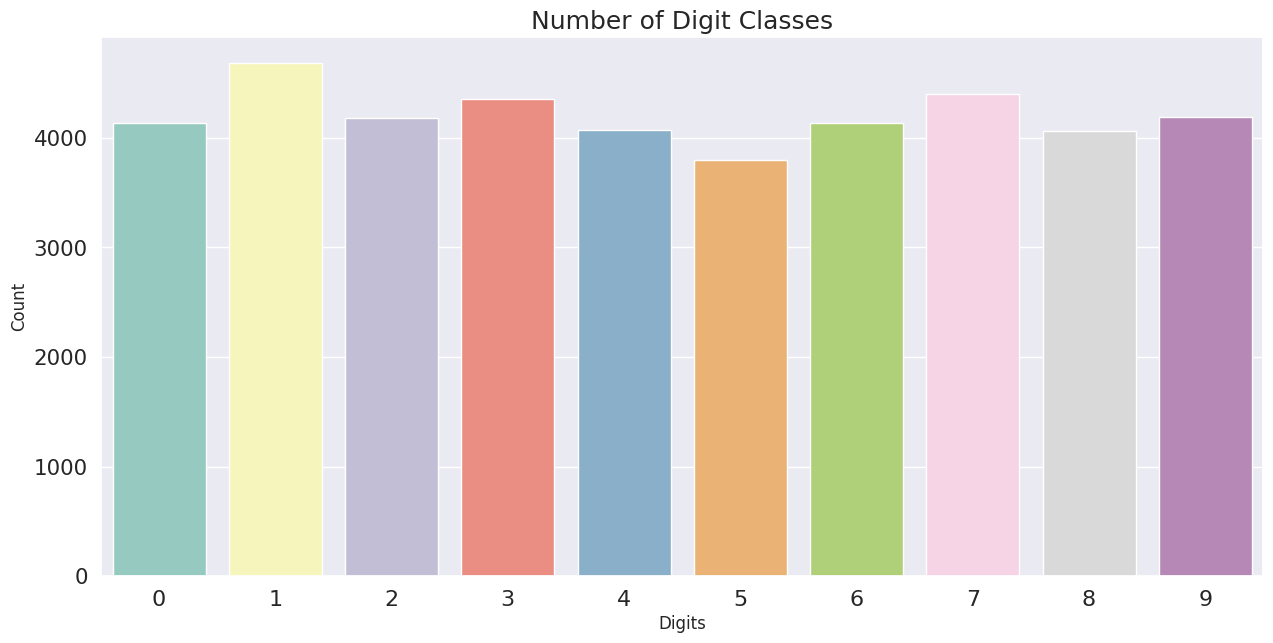

In [4]:
plt.figure(figsize=(15,7))
g = sns.countplot(x = train_df['label'], palette = 'Set3')
plt.title("Number of Digit Classes", size = 18)
plt.xticks(size = 16)
plt.xlabel("Digits", size = 12)
plt.ylabel("Count", size =12)
train_df['label'].value_counts()

In [5]:
X_train = (train_df.drop(['label'], 1).values).astype('float32')
y_train = (train_df['label'].values).astype('int32')
# X_test = test_df.values.astype('float32')

In [6]:
X_train = X_train/255.0
# X_test = X_test/255.0

X_train = X_train.reshape(-1, 28, 28, 1)
# X_test = X_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, num_classes = 10)

X_train, X_val, y_train, Y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=42)

In [7]:
# create model 

model=Sequential()
 
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))

In [8]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
%cd /content/drive/MyDrive

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
mcp_save = ModelCheckpoint('Handwrite_Recognize.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='auto')

/content/drive/MyDrive


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         1

In [11]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

In [12]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=15,
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False)  

In [13]:
batch_size = 64
epochs = 20

In [14]:
datagen.fit(X_train)
h = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction, early_stopping, mcp_save],)

Epoch 1/20
590/590 [==============================] - ETA: 0s - loss: 0.1732 - accuracy: 0.9454


Epoch 1: val_loss improved from inf to 0.09229, saving model to Handwrite_Recognize.h5
590/590 [==============================] - 37s 33ms/step - loss: 0.1732 - accuracy: 0.9454 - val_loss: 0.0923 - val_accuracy: 0.9700 - lr: 0.0010
Epoch 2/20
589/590 [============================>.] - ETA: 0s - loss: 0.0762 - accuracy: 0.9766


Epoch 2: val_loss did not improve from 0.09229
590/590 [==============================] - 19s 32ms/step - loss: 0.0762 - accuracy: 0.9766 - val_loss: 0.1179 - val_accuracy: 0.9688 - lr: 0.0010
Epoch 3/20
588/590 [============================>.] - ETA: 0s - loss: 0.0566 - accuracy: 0.9824


Epoch 3: val_loss improved from 0.09229 to 0.05421, saving model to Handwrite_Recognize.h5
590/590 [==============================] - 17s 30ms/step - loss: 0.0566 - accuracy: 0.9824 - val_loss: 0.0542 - val_accuracy: 0.9867 - lr: 0.0010
Epoch 4/20
590/590 [==============================] - ETA: 0s - loss: 0.0515 - accuracy: 0.9840


Epoch 4: val_loss did not improve from 0.05421
590/590 [==============================] - 18s 30ms/step - loss: 0.0515 - accuracy: 0.9840 - val_loss: 0.0692 - val_accuracy: 0.9802 - lr: 0.0010
Epoch 5/20
590/590 [==============================] - ETA: 0s - loss: 0.0492 - accuracy: 0.9855


Epoch 5: val_loss improved from 0.05421 to 0.04756, saving model to Handwrite_Recognize.h5
590/590 [==============================] - 18s 30ms/step - loss: 0.0492 - accuracy: 0.9855 - val_loss: 0.0476 - val_accuracy: 0.9900 - lr: 0.0010
Epoch 6/20
588/590 [============================>.] - ETA: 0s - loss: 0.0389 - accuracy: 0.9881


Epoch 6: val_loss did not improve from 0.04756
590/590 [==============================] - 17s 29ms/step - loss: 0.0393 - accuracy: 0.9881 - val_loss: 0.0500 - val_accuracy: 0.9876 - lr: 0.0010
Epoch 7/20
589/590 [============================>.] - ETA: 0s - loss: 0.0408 - accuracy: 0.9873


Epoch 7: val_loss did not improve from 0.04756
590/590 [==============================] - 17s 30ms/step - loss: 0.0408 - accuracy: 0.9873 - val_loss: 0.0566 - val_accuracy: 0.9874 - lr: 0.0010
Epoch 8/20
590/590 [==============================] - ETA: 0s - loss: 0.0394 - accuracy: 0.9877


Epoch 8: val_loss improved from 0.04756 to 0.04188, saving model to Handwrite_Recognize.h5
590/590 [==============================] - 18s 30ms/step - loss: 0.0394 - accuracy: 0.9877 - val_loss: 0.0419 - val_accuracy: 0.9886 - lr: 0.0010
Epoch 9/20
588/590 [============================>.] - ETA: 0s - loss: 0.0348 - accuracy: 0.9893


Epoch 9: val_loss improved from 0.04188 to 0.03921, saving model to Handwrite_Recognize.h5
590/590 [==============================] - 18s 30ms/step - loss: 0.0347 - accuracy: 0.9893 - val_loss: 0.0392 - val_accuracy: 0.9905 - lr: 0.0010
Epoch 10/20
590/590 [==============================] - ETA: 0s - loss: 0.0340 - accuracy: 0.9890


Epoch 10: val_loss improved from 0.03921 to 0.03917, saving model to Handwrite_Recognize.h5
590/590 [==============================] - 20s 34ms/step - loss: 0.0340 - accuracy: 0.9890 - val_loss: 0.0392 - val_accuracy: 0.9924 - lr: 0.0010
Epoch 11/20
590/590 [==============================] - ETA: 0s - loss: 0.0285 - accuracy: 0.9911


Epoch 11: val_loss improved from 0.03917 to 0.03857, saving model to Handwrite_Recognize.h5
590/590 [==============================] - 18s 30ms/step - loss: 0.0285 - accuracy: 0.9911 - val_loss: 0.0386 - val_accuracy: 0.9912 - lr: 0.0010
Epoch 12/20
590/590 [==============================] - ETA: 0s - loss: 0.0300 - accuracy: 0.9904


Epoch 12: val_loss improved from 0.03857 to 0.03733, saving model to Handwrite_Recognize.h5
590/590 [==============================] - 18s 30ms/step - loss: 0.0300 - accuracy: 0.9904 - val_loss: 0.0373 - val_accuracy: 0.9931 - lr: 0.0010
Epoch 13/20
590/590 [==============================] - ETA: 0s - loss: 0.0262 - accuracy: 0.9916


Epoch 13: val_loss did not improve from 0.03733
590/590 [==============================] - 17s 28ms/step - loss: 0.0262 - accuracy: 0.9916 - val_loss: 0.0441 - val_accuracy: 0.9902 - lr: 0.0010
Epoch 14/20
590/590 [==============================] - ETA: 0s - loss: 0.0287 - accuracy: 0.9916


Epoch 14: val_loss did not improve from 0.03733
590/590 [==============================] - 17s 29ms/step - loss: 0.0287 - accuracy: 0.9916 - val_loss: 0.0454 - val_accuracy: 0.9895 - lr: 0.0010
Epoch 15/20
589/590 [============================>.] - ETA: 0s - loss: 0.0249 - accuracy: 0.9919


Epoch 15: val_loss did not improve from 0.03733
590/590 [==============================] - 17s 28ms/step - loss: 0.0248 - accuracy: 0.9919 - val_loss: 0.0803 - val_accuracy: 0.9826 - lr: 0.0010
Epoch 16/20
589/590 [============================>.] - ETA: 0s - loss: 0.0237 - accuracy: 0.9930


Epoch 16: val_loss improved from 0.03733 to 0.03166, saving model to Handwrite_Recognize.h5
590/590 [==============================] - 19s 31ms/step - loss: 0.0237 - accuracy: 0.9930 - val_loss: 0.0317 - val_accuracy: 0.9926 - lr: 0.0010
Epoch 17/20
588/590 [============================>.] - ETA: 0s - loss: 0.0235 - accuracy: 0.9925


Epoch 17: val_loss did not improve from 0.03166
590/590 [==============================] - 17s 28ms/step - loss: 0.0237 - accuracy: 0.9925 - val_loss: 0.0358 - val_accuracy: 0.9924 - lr: 0.0010
Epoch 18/20
588/590 [============================>.] - ETA: 0s - loss: 0.0232 - accuracy: 0.9929


Epoch 18: val_loss did not improve from 0.03166
590/590 [==============================] - 17s 28ms/step - loss: 0.0232 - accuracy: 0.9929 - val_loss: 0.0366 - val_accuracy: 0.9931 - lr: 0.0010
Epoch 19/20
589/590 [============================>.] - ETA: 0s - loss: 0.0233 - accuracy: 0.9928


Epoch 19: val_loss improved from 0.03166 to 0.02197, saving model to Handwrite_Recognize.h5
590/590 [==============================] - 19s 31ms/step - loss: 0.0233 - accuracy: 0.9928 - val_loss: 0.0220 - val_accuracy: 0.9950 - lr: 0.0010
Epoch 20/20
589/590 [============================>.] - ETA: 0s - loss: 0.0218 - accuracy: 0.9933


Epoch 20: val_loss did not improve from 0.02197
590/590 [==============================] - 17s 28ms/step - loss: 0.0218 - accuracy: 0.9933 - val_loss: 0.0285 - val_accuracy: 0.9931 - lr: 0.0010


In [15]:
final_loss, final_acc = model.evaluate(X_val, Y_val, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 0.028468, final accuracy: 0.993095


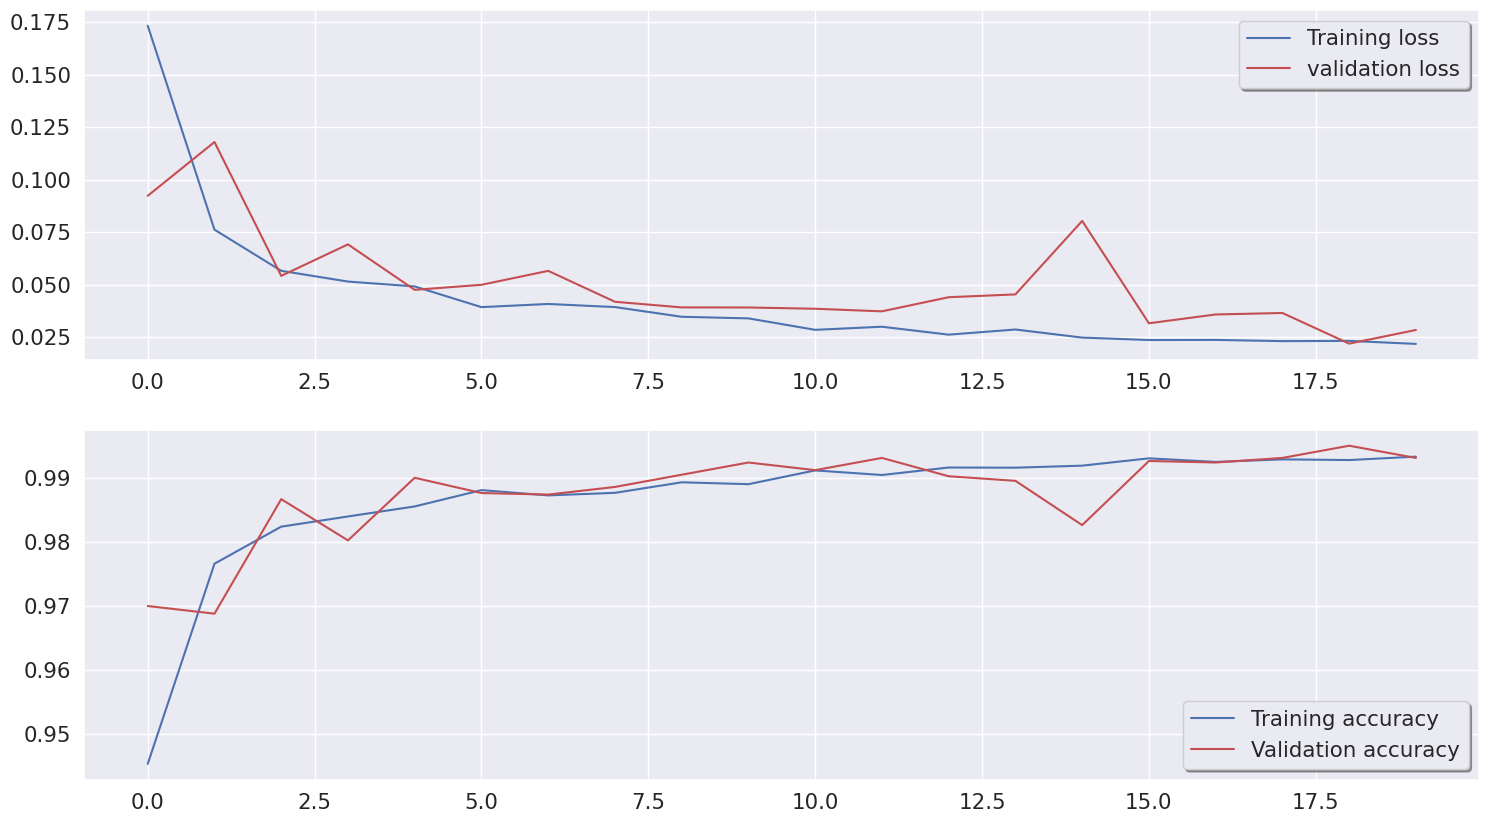

In [16]:
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(h.history['loss'], color='b', label="Training loss")
ax[0].plot(h.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(h.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(h.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)